In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [15]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
x_train[0].shape

(28, 28)

In [19]:
y_train[0]

5

## Normalization

x_train=x_train/255
x_test=x_test/255

In [20]:
import cv2

#

In [21]:
from tensorflow import keras

In [22]:
model= Sequential([
    Flatten(input_shape=(28,28)),
    keras.layers.Rescaling(1./255),
    Dense(256,activation='relu',name='Hidden_layer5'),
    Dropout(0.2),
    Dense(128,activation='relu',name='Hidden_layer6'),
    Dropout(0.1),
    Dense(64,activation='relu',name='Hidden_layer7'),
    Dense(10, activation='softmax',name='Output_Layer')
    
])

2024-12-06 16:33:12.768038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-06 16:33:12.784380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-06 16:33:12.784537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_1 (Rescaling)     (None, 784)               0         
                                                                 
 Hidden_layer5 (Dense)       (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Hidden_layer6 (Dense)       (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 Hidden_layer7 (Dense)       (None, 64)                8

In [26]:
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer=Adam(0.1),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
his=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10


2024-12-06 16:33:56.572076: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:190] failed to create cublas handle: the library was not initialized
2024-12-06 16:33:56.572106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:193] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2024-12-06 16:33:56.572121: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at matmul_op_impl.h:627 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Graph execution error:

Detected at node 'sequential/Hidden_layer5/MatMul' defined at (most recent call last):
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_28675/3223288505.py", line 1, in <module>
      his=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_split=0.1)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/Hidden_layer5/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/Hidden_layer5/MatMul}}]] [Op:__inference_train_function_1363]

In [65]:
from tensorflow.keras.layers import MaxPooling2D

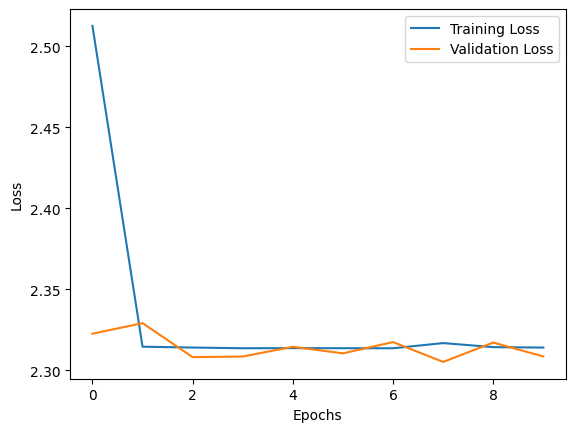

In [66]:
plt.plot(his.history['loss'],label='Training Loss')
plt.plot(his.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

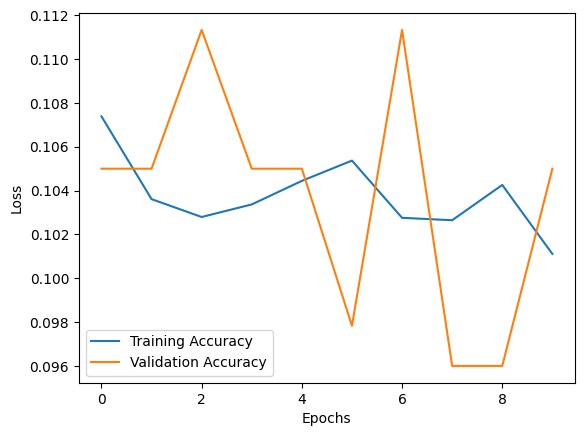

In [67]:
plt.plot(his.history['accuracy'],label='Training Accuracy')
plt.plot(his.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 2.3060 - accuracy: 0.1135


[2.3060131072998047, 0.11349999904632568]

In [69]:
y_pred= model.predict(x_test)

313/313 [==============================] - 0s 727us/step


In [70]:
y_pred=np.argmax(y_pred,axis=1)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_test,y_pred)

/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



<Axes: >

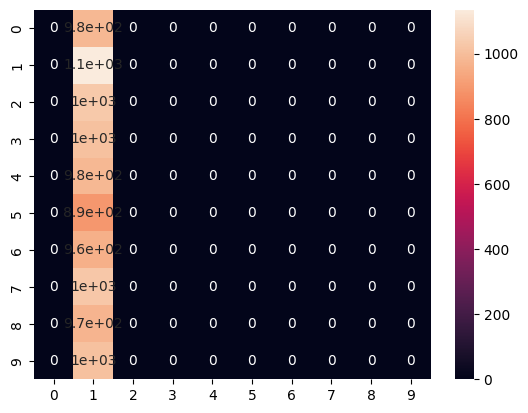

In [73]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

## Using convolutional layers

In [76]:
cnn1=Sequential(
    [
        Input(shape=(28,28,1)),
        keras.layers.Rescaling(1./255),
        Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',name='CONV2D_v1'),
        MaxPooling2D(pool_size=(4,4),strides=(2,2)),
        Flatten(),
        Dense(100,activation='relu',name='Hidden_layer'),
        Dropout(0.2),
        Dense(10,activation='softmax',name='Output_layer')
    ]
)

In [77]:
cnn1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 CONV2D_v1 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3872)              0         
                                                                 
 Hidden_layer (Dense)        (None, 100)               387300    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                      

In [78]:
cnn1.compile(optimizer=Adam(0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
his_cnn1=cnn1.fit(x=x_train,y=y_train,batch_size=32,epochs=30,validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 8s 4ms/step - loss: 2.5721 - accuracy: 0.1037 - val_loss: 2.3150 - val_accuracy: 0.1050
Epoch 2/30
1688/1688 [==============================] - 8s 5ms/step - loss: 2.3141 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.1113
Epoch 3/30
1688/1688 [==============================] - 8s 4ms/step - loss: 2.3134 - accuracy: 0.1045 - val_loss: 2.3098 - val_accuracy: 0.1045
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3141 - accuracy: 0.1014 - val_loss: 2.3140 - val_accuracy: 0.1113
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3145 - accuracy: 0.1022 - val_loss: 2.3173 - val_accuracy: 0.1113
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3133 - accuracy: 0.1047 - val_loss: 2.3033 - val_accuracy: 0.1113
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3143 - accuracy: 0.1016 - val_loss: 2.3077 - val_accuracy:

In [80]:
plt.plot(cnn1.history['loss'],label='Training Loss')
plt.plot(cnn1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

TypeError: 'History' object is not subscriptable